In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# 1. load and preprocess fashion MNIST
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [12]:
#reduce training set ize for a faster classroom demo
x_train_sub,y_train_sub=x_train[:20000],y_train[:20000]
x_val,y_val=x_train[20000:25000],y_train[20000:25000]

In [13]:
#normalize adn add channel dim
x_train_sub=x_train_sub.astype("float32")/255.0
x_val=x_val.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


In [14]:
#add a new dimensions at the end (-1 means "last position")
#why? because CNNs expect images in the form: (height,width,channnels)
#fashion MNIST images are grayscale,so they have only 1 channel
#original shape:(28,28)
#after expand_dims:(28,28,1)


x_train_sub=np.expand_dims(x_train_sub,-1) #add channel dimensions to training data
x_val = np.expand_dims(x_val,-1) #add channel to va
x_test = np.expand_dims(x_test,-1)

num_classes = 10

In [15]:
def build_moderate_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,activation="relu".input_shape(28,28,1)),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(64,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(num_classes,activation="softmax")
    ])
    
    return model

In [16]:
# 3. optimizers to compare
optimizers={
    "SGD":tf.keras.optimizers.SGD(lr=0.01),
    "SGD_momentum":tf.keras.optimizers.SGD(lr=0.01,momentum=0.9),
    "RMSProp":tf.keras.optimizers.RMSprop(lr=0.001),
    "Adam":tf.keras.optimizers.Adam(lr=0.001),
}

In [17]:
histories={}
epochs=10
batch_size=128

# 4.train same architecture separetly with each optimizer
for name,opt in optimizers.items():
    print(f"\n---Tr aining with optimizer: {name} ---")
    model=build_moderate_cnn()
    model.compile(optimizer=opt,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuray"])
    history=model.fit(
    x_train_sub,y_train_sub,
    validation_data=(x_val,y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
    )
    
    histories[name] = history.history


---TRaining with optimizer: SGD ---


AttributeError: 'str' object has no attribute 'input_shape'

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

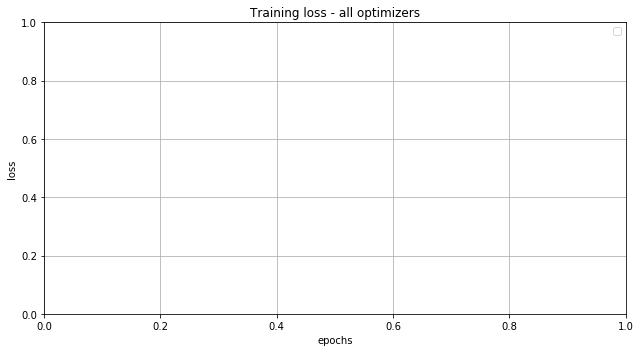

In [18]:
# 5. plot training loss (one figure)
plt.figure(figsize=(9,5))
for name ,h in histories.items():
    plt.plot(h["loss"],label=f'{name} loss')
plt.title("Training loss - all optimizers")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show

In [ ]:
# 6.plot validation accuracy (separte figure)
plt.figure(figsize=(9,5))
for name ,h in histories.items():
    plt.plot(h["val_accuracy"],label=f'{name} val_acc')
plt.title("validation accuracy - all optimizers")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 7.fianl summary
print("\nFinal metrics summary (after {} epochs)".format(epochs))
for name,h in histories.items():
    print(f"{name:15s} final loss = {h['loss'][-1]:.4f} ; final val_acc = {h['val_accuracy'][-1]:.4f}")